# **라이브러리**

In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

# **함수모음**

## **모델링**

In [2]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.5)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

def modeling_(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred
    

In [11]:
dataset4.loc[dataset['회사명'] == '(주)경윤하이드로에너지']

,회사명,거래소코드,회계년도,설비투자효율,총자본투자효율,부채구성비율,비유동장기적합률,재고자산보유기간,매출채권회수기간,매입채무회전률,경영자본회전률,경영자본순이익률,자기자본순이익률,자기자본증가율,년,key,부도
109,(주)경윤하이드로에너지,19120.0,2000/12,182.22,27.08,42.879257,44.47,44.512195,23.685918,116.01,1.76,8.45,13.12,-4.44,2000.0,191202001.0,0.0
110,(주)경윤하이드로에너지,19120.0,2001/12,203.92,28.52,43.149698,39.80,54.154303,30.932203,64.44,1.76,10.09,15.28,9.55,2001.0,191202002.0,0.0
111,(주)경윤하이드로에너지,19120.0,2002/12,137.84,26.89,40.737914,69.52,63.588850,22.955975,57.57,1.85,9.29,12.49,7.77,2002.0,191202003.0,0.0
112,(주)경윤하이드로에너지,19120.0,2003/12,106.14,19.01,40.441237,79.04,67.095588,43.608124,45.33,1.75,4.40,4.85,21.07,2003.0,191202004.0,0.0
113,(주)경윤하이드로에너지,19120.0,2004/12,77.06,11.69,43.210858,75.32,82.954545,62.822719,42.17,1.52,5.47,6.00,-0.93,2004.0,191202005.0,0.0
114,(주)경윤하이드로에너지,19120.0,2005/12,8.10,1.12,42.030492,77.46,105.491329,87.112172,51.95,1.21,-7.30,-8.31,1.52,2005.0,191202006.0,0.0
115,(주)경윤하이드로에너지,19120.0,2006/12,-4.52,-0.53,50.210258,94.08,68.224299,105.491329,32.48,1.34,-13.68,-16.00,-14.53,2006.0,191202007.0,1.0
116,(주)경윤하이드로에너지,19120.0,2007/12,-2.90,-0.32,54.911943,131.60,48.472776,102.816901,20.22,1.44,-13.69,-15.79,-18.06,2007.0,191202008.0,0.0
117,(주)경윤하이드로에너지,19120.0,2008/12,-216.85,-14.08,67.801626,244.14,23.322684,55.981595,12.69,2.17,-62.78,-57.52,-46.43,2008.0,191202009.0,0.0
118,(주)경윤하이드로에너지,19120.0,2009/12,-454.57,-22.07,36.924714,86.30,0.000000,178.048780,2.30,0.49,-90.22,-63.29,161.49,2009.0,191202010.0,0.0


## **스코어**

In [3]:
def scoring(y_true, y_pred):
    print('accuracy:', accuracy_score(y_true,y_pred))
    print('f1-Score:', f1_score(y_true, y_pred, average='macro'))
    print('Recall:',recall_score(y_true, y_pred, average='macro'))
    print('Precision:',precision_score(y_true, y_pred, average='macro'))
    print(confusion_matrix(y_true, y_pred))

## **귀찮다 귀찮아**

In [59]:
def conclu(X,y,test):
    modeling(DecisionTreeClassifier(), X,y,test)
    modeling(RandomForestClassifier(),X,y,test)
    modeling(AdaBoostClassifier(), X,y,test)
    modeling(LogisticRegression(), X,y,test)
    modeling(KNeighborsClassifier(), X,y,test)
    modeling(SVC(probability=True), X,y,test)
    modeling(LGBMClassifier(), X,y,test)
    modeling(CatBoostClassifier(silent=True),X,y,test)
    modeling(MLPClassifier(),X,y,test)
    modeling(XGBClassifier(),X,y,test)

# **데이터 나누기**

## **재무데이터**

In [4]:
dataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\0y_finan.csv')
dataset1 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\1y_finan.csv')
dataset2 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\2y_finan.csv')
dataset3 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\3y_finan.csv')
dataset4 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\4y_finan.csv')

dataset.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도'],
      dtype='object')

## **재무데이터 + 비재무데이터**

In [88]:
ajdataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\SH\csv\step3\dataset_step3.csv')
ajdataset1 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\SH\csv\step3\dataset1_step3.csv')
ajdataset2 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\SH\csv\step3\dataset2_step3.csv')
ajdataset3 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\SH\csv\step3\dataset3_step3.csv')
ajdataset4 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\SH\csv\step3\dataset4_step3.csv')

ajdataset.columns

Index(['Unnamed: 0', '회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율',
       '비유동장기적합률', '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률',
       '자기자본순이익률', '자기자본증가율', '년', 'key', '부도', '대표이사_변경', '최대주주_변경', '회계처리위반',
       '횡령배임', '영업조업중단', '종가변동률', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타'],
      dtype='object')

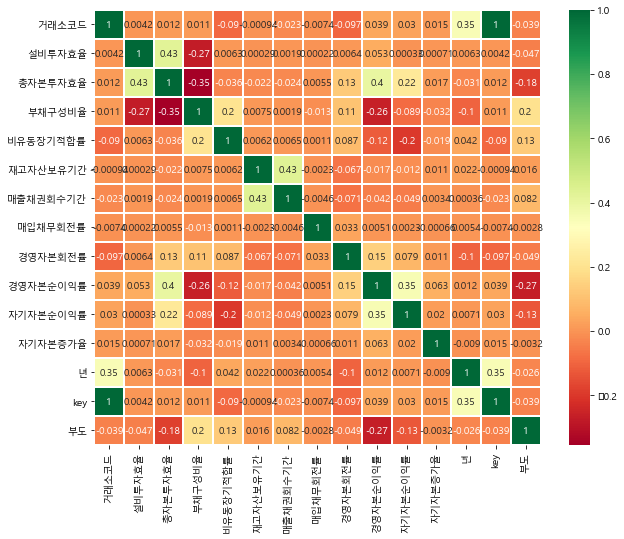

In [89]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [90]:
def splittrain(data):
    subdata = data.sort_values(by='년').reset_index(drop=True)
    data = subdata.loc[subdata['년'] < 2015]
    return data

def splittesst(data):
    global test
    subdata = data.sort_values(by='년').reset_index(drop=True)
    test = subdata.loc[subdata['년'] >= 2015]
    return test

In [91]:
dataset_ = splittrain(dataset)
test_ = splittesst(dataset)
dataset1_ = splittrain(dataset1)
test1_ = splittesst(dataset1)
dataset2_ = splittrain(dataset2)
test2_ = splittesst(dataset2)
dataset3_ = splittrain(dataset3)
test3_ = splittesst(dataset3)
dataset4_ = splittrain(dataset4)
test4_ = splittesst(dataset4)

ajdataset_ = splittrain(ajdataset)
ajtest_ = splittesst(ajdataset)
ajdataset1_ = splittrain(ajdataset1)
ajtest1_ = splittesst(ajdataset1)
ajdataset2_ = splittrain(ajdataset2)
ajtest2_ = splittesst(ajdataset2)
ajdataset3_ = splittrain(ajdataset3)
ajtest3_ = splittesst(ajdataset3)
ajdataset4_ = splittrain(ajdataset4)
ajtest4_ = splittesst(ajdataset4)


In [92]:
drop_feature = ['회사명', '거래소코드', '회계년도','년', 'key', '부도']
ajdrop_feature = ['회사명', '거래소코드', '회계년도','년', 'key', '부도','Unnamed: 0']

## **세트 1. 재무데이터 train,test 분리**

In [93]:
X = dataset_.drop(drop_feature, axis=1)
X1 = dataset1_.drop(drop_feature, axis=1)
X2 = dataset2_.drop(drop_feature, axis=1)
X3 = dataset3_.drop(drop_feature, axis=1)
X4 = dataset4_.drop(drop_feature, axis=1)

y = dataset_['부도']
y1 = dataset1_['부도']
y2 = dataset2_['부도']
y3 = dataset3_['부도']
y4 = dataset4_['부도']


In [152]:
X_test =test_.drop(drop_feature, axis=1)
X1_test =test1_.drop(drop_feature, axis=1)
X2_test =test2_.drop(drop_feature, axis=1)
X3_test =test3_.drop(drop_feature, axis=1)
X4_test =test4_.drop(drop_feature, axis=1)

y_test= test_['부도']
y1_test =test1_['부도']
y2_test =test2_['부도']
y3_test =test3_['부도']
y4_test =test4_['부도']

print(X_test.shape, y_test.shape)

(8504, 11) (8504,)


## **세트2 재무 + 비재무데이터 train, test 분리**

In [95]:
ajX = ajdataset_.drop(ajdrop_feature, axis=1)
ajX1 = ajdataset1_.drop(ajdrop_feature, axis=1)
ajX2 = ajdataset2_.drop(ajdrop_feature, axis=1)
ajX3 = ajdataset3_.drop(ajdrop_feature, axis=1)
ajX4 = ajdataset4_.drop(ajdrop_feature, axis=1)

ajy = ajdataset_['부도']
ajy1 = ajdataset1_['부도']
ajy2 = ajdataset2_['부도']
ajy3 = ajdataset3_['부도']
ajy4 = ajdataset4_['부도']

In [96]:
ajX_test =ajtest_.drop(ajdrop_feature, axis=1)
ajX1_test =ajtest1_.drop(ajdrop_feature, axis=1)
ajX2_test =ajtest2_.drop(ajdrop_feature, axis=1)
ajX3_test =ajtest3_.drop(ajdrop_feature, axis=1)
ajX4_test =ajtest4_.drop(ajdrop_feature, axis=1)

ajy_test= ajtest_['부도']
ajy1_test =ajtest1_['부도']
ajy2_test =ajtest2_['부도']
ajy3_test =ajtest3_['부도']
ajy4_test =ajtest4_['부도']

# **YEAR**

In [163]:
X = np.array(X)
ajX = np.array(ajX)

# **데이터 검증 및 언더샘플링**

In [161]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

def run_skfold(X,y):
    X, y = RandomUnderSampler(random_state=1).fit_resample(X, y) # RandomUnderSampling
    skf = StratifiedKFold(n_splits=4, shuffle=True)
    valarr = [] # Validation Set's Accuracy
    models = [DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),KNeighborsClassifier(),
    SVC(probability=True),LGBMClassifier(),CatBoostClassifier(silent=True),MLPClassifier(),XGBClassifier()]

    for model in models:
        val_pred = 0
        for train_index, val_index in skf.split(X,y):
            # print("TRAIN:", train_index, "TEST:", val_index)
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            val_pred += accuracy_score(y_val, modeling(model, X_train, y_train, X_val))
        valarr.append(val_pred/4)
    return valarr

In [164]:
ajdata = run_skfold(ajX,ajy)
ajdata

[15:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[0.8079885057471266,
 0.872487684729064,
 0.8381280788177339,
 0.7260755336617406,
 0.8208949096880132,
 0.54,
 0.8524630541871921,
 0.8682101806239737,
 0.7535550082101807,
 0.8438177339901478]

## **세트1**

In [159]:
pd.DataFrame({'Model': mdn, 'Val': valarr, 'Test' : acc})

,Model,Val,Test
0,Decision Tree,0.763588,0.6956
1,Random Forest,0.842414,0.8179
2,Adaboost,0.797980,0.8180
3,logistic,0.786593,0.7174
4,KNN,0.797989,0.8563
5,SVC,0.550279,0.0063
6,lightGBM,0.816642,0.8034
7,Catboost,0.835230,0.8278
8,MLP,0.760862,0.7507
9,Xgboost,0.815164,0.7949


In [154]:
########################################################################################## 데이터셋 1
dt_clf = modeling(DecisionTreeClassifier(), X, y, X_test)
rf_clf = modeling(RandomForestClassifier(),X, y, X_test)
ada_clf = modeling(AdaBoostClassifier(), X, y, X_test)
lg_clf = modeling(LogisticRegression(), X, y, X_test)
knn_clf = modeling(KNeighborsClassifier(), X, y, X_test)
svc_clf = modeling(SVC(probability=True), X, y, X_test)
lgmb_clf = modeling(LGBMClassifier(), X, y, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X, y, X_test)
mlp_clf = modeling(MLPClassifier(),X, y, X_test)
xgb_clf = modeling(XGBClassifier(),X, y, X_test)

########################################################################################## 데이터셋 2
ajdt_clf = modeling(DecisionTreeClassifier(), ajX_train, ajy_train, ajX_test)
ajrf_clf = modeling(RandomForestClassifier(),ajX_train, ajy_train, ajX_test)
ajada_clf = modeling(AdaBoostClassifier(), ajX_train, ajy_train, ajX_test)
ajlg_clf = modeling(LogisticRegression(), ajX_train, ajy_train, ajX_test)
ajknn_clf = modeling(KNeighborsClassifier(), ajX_train, ajy_train, ajX_test)
ajsvc_clf = modeling(SVC(probability=True), ajX_train, ajy_train, ajX_test)
ajlgmb_clf = modeling(LGBMClassifier(), ajX_train, ajy_train, ajX_test)
ajcat_clf = modeling(CatBoostClassifier(silent=True),ajX_train, ajy_train, ajX_test)
ajmlp_clf = modeling(MLPClassifier(),ajX_train, ajy_train, ajX_test)
ajxgb_clf = modeling(XGBClassifier(),ajX_train, ajy_train, ajX_test)

arr =[dt_clf,rf_clf,ada_clf,lg_clf,knn_clf,svc_clf,lgmb_clf,cat_clf,mlp_clf,xgb_clf]
ajarr = [ajdt_clf,ajrf_clf,ajada_clf,ajlg_clf,ajknn_clf,ajsvc_clf,ajlgmb_clf,ajcat_clf,ajmlp_clf,ajxgb_clf]

[15:27:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
for i in arr:
    print(scoring(y_test , i))
    print('-'*60)

for i in ajarr:
    print(scoring(y_test , i))
    print('-'*60)

accuracy: 0.7115475070555033
f1-Score: 0.4306883379942413
Recall: 0.7236220788876162
Precision: 0.5067076164706771
[[6012 2439]
 [  14   39]]
None
------------------------------------------------------------
accuracy: 0.8217309501411101
f1-Score: 0.4770547767393562
Recall: 0.8071836982560956
Precision: 0.5127840899852162
[[6946 1505]
 [  11   42]]
None
------------------------------------------------------------
accuracy: 0.8179680150517403
f1-Score: 0.47308700229782596
Recall: 0.7677912405141292
Precision: 0.5110124247331213
[[6918 1533]
 [  15   38]]
None
------------------------------------------------------------
accuracy: 0.7174270931326434
f1-Score: 0.4348985548221583
Recall: 0.7734542970241325
Precision: 0.5082819502291853
[[6057 2394]
 [   9   44]]
None
------------------------------------------------------------
accuracy: 0.8563029162746942
f1-Score: 0.48893818583690424
Recall: 0.7683293034429329
Precision: 0.5133341166130408
[[7246 1205]
 [  17   36]]
None
-------------------

In [150]:
y_test.shape

(8504,)

In [156]:
mdn = ['Decision Tree','Random Forest','Adaboost','logistic', 'KNN','SVC','lightGBM','Catboost','MLP','Xgboost']
acc = []

for i in arr:
    acc.append(round(accuracy_score(y_test, i),4))

pd.DataFrame({'모델':mdn, 'accuracy':acc}).sort_values(by='accuracy', ascending=False).T

,4,7,2,1,6,9,8,3,0,5
모델,KNN,Catboost,Adaboost,Random Forest,lightGBM,Xgboost,MLP,logistic,Decision Tree,SVC
accuracy,0.8563,0.8278,0.818,0.8179,0.8034,0.7949,0.7507,0.7174,0.6956,0.0063


In [80]:
mdn = ['Decision Tree','Random Forest','Adaboost','logistic', 'KNN','SVC','lightGBM','Catboost','MLP','Xgboost']
acc = []

for i in varr:
    acc.append(round(accuracy_score(y_val, i),4))

pd.DataFrame({'모델':mdn, 'accuracy':acc}).sort_values(by='accuracy', ascending=False).T

,4,7,1,2,6,9,8,0,3,5
모델,KNN,Catboost,Random Forest,Adaboost,lightGBM,Xgboost,MLP,Decision Tree,logistic,SVC
accuracy,0.8873,0.8753,0.8644,0.8625,0.8612,0.8505,0.817,0.7591,0.7482,0.0194


In [83]:
acc = []
for i in vajarr:
    acc.append(round(accuracy_score(ajy_val, i),4))

pd.DataFrame({'모델':mdn, 'accuracy':acc}).sort_values(by='accuracy', ascending=False).T

,7,1,4,6,9,2,8,3,0,5
모델,Catboost,Random Forest,KNN,lightGBM,Xgboost,Adaboost,MLP,logistic,Decision Tree,SVC
accuracy,0.8961,0.8917,0.8876,0.8838,0.8808,0.8764,0.8666,0.8587,0.8006,0.0191


In [84]:
acc = []
for i in ajarr:
    acc.append(round(accuracy_score(ajy_test, i),4))

pd.DataFrame({'모델':mdn, 'accuracy':acc}).sort_values(by='accuracy', ascending=False).T

,4,1,7,6,9,3,2,8,0,5
모델,KNN,Random Forest,Catboost,lightGBM,Xgboost,logistic,Adaboost,MLP,Decision Tree,SVC
accuracy,0.855,0.8524,0.8495,0.8368,0.8353,0.8307,0.8271,0.7563,0.7217,0.0063


# **1YEAR AGO**

In [36]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state = 488)
X1_train , y1_train = RandomUnderSampler(random_state=0).fit_resample(X1 , y1)

In [37]:
dt_clf1 = modeling(DecisionTreeClassifier(), X1_train, y1_train, X1_test)
rf_clf1 = modeling(RandomForestClassifier(),X1_train, y1_train, X1_test)
ada_clf1 = modeling(AdaBoostClassifier(), X1_train, y1_train, X1_test)
lg_clf1 = modeling(LogisticRegression(), X1_train, y1_train, X1_test)
knn_clf1 = modeling(KNeighborsClassifier(), X1_train, y1_train, X1_test)
svc_clf1 = modeling(SVC(probability=True), X1_train, y1_train, X1_test)
lgmb_clf1 = modeling(LGBMClassifier(), X1_train, y1_train, X1_test)
cat_clf1 = modeling(CatBoostClassifier(silent=True),X1_train, y1_train, X1_test)
mlp_clf1 = modeling(MLPClassifier(),X1_train, y1_train, X1_test)
xgb_clf1 = modeling(XGBClassifier(),X1_train, y1_train, X1_test)

[19:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
models = CatBoostClassifier(silent=True)
models.fit(X1_train,y1_train)
accuracy_score(y1_val, models.predict(X1_val))

0.8199672667757774

In [17]:
scoring(y1_test , lgmb_clf1)

accuracy: 0.7345954844778928
f1-Score: 0.4393885522219894
Recall: 0.7629690949227372
Precision: 0.5075111106888857
[[6209 2247]
 [  10   38]]


# **2YEARS AGO**

In [39]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state = 488)
X2_train , y2_train = RandomUnderSampler(random_state=1).fit_resample(X2 , y2)

In [40]:
dt_clf2 = modeling(DecisionTreeClassifier(), X2_train, y2_train, X2_test)
rf_clf2 = modeling(RandomForestClassifier(),X2_train, y2_train, X2_test)
ada_clf2 = modeling(AdaBoostClassifier(), X2_train, y2_train, X2_test)
lg_clf2 = modeling(LogisticRegression(), X2_train, y2_train, X2_test)
knn_clf2 = modeling(KNeighborsClassifier(), X2_train, y2_train, X2_test)
svc_clf2 = modeling(SVC(probability=True), X2_train, y2_train, X2_test)
lgmb_clf2 = modeling(LGBMClassifier(), X2_train, y2_train, X2_test)
cat_clf2 = modeling(CatBoostClassifier(silent=True),X2_train, y2_train, X2_test)
mlp_clf2 = modeling(MLPClassifier(),X2_train, y2_train, X2_test)
xgb_clf2 = modeling(XGBClassifier(),X2_train, y2_train, X2_test)

[19:23:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
models = CatBoostClassifier(silent=True)
models.fit(X2_train,y2_train)
accuracy_score(y2_val, models.predict(X2_val))

0.7962356792144026

In [32]:
scoring(y2_test , cat_clf2)

accuracy: 0.69379115710254
f1-Score: 0.4211990239190028
Recall: 0.7024050649538296
Precision: 0.5049946314186765
[[5868 2591]
 [  13   32]]


# **3YEARS AGO**

In [22]:
X3_train, X3_val, y3_train, y3_val = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state = 488)
X3_train , y3_train = RandomUnderSampler(random_state=0).fit_resample(X3 , y3)

dt_clf3 = modeling(DecisionTreeClassifier(), X3_train, y3_train, X3_test)
rf_clf3 = modeling(RandomForestClassifier(),X3_train, y3_train, X3_test)
ada_clf3 = modeling(AdaBoostClassifier(), X3_train, y3_train, X3_test)
lg_clf3 = modeling(LogisticRegression(), X3_train, y3_train, X3_test)
knn_clf3 = modeling(KNeighborsClassifier(), X3_train, y3_train, X3_test)
svc_clf3 = modeling(SVC(probability=True), X3_train, y3_train, X3_test)
lgmb_clf3 = modeling(LGBMClassifier(), X3_train, y3_train, X3_test)
cat_clf3 = modeling(CatBoostClassifier(silent=True),X3_train, y3_train, X3_test)
mlp_clf3 = modeling(MLPClassifier(),X3_train, y3_train, X3_test)
xgb_clf3 = modeling(XGBClassifier(),X3_train, y3_train, X3_test)

[19:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
models = CatBoostClassifier(silent=True)
models.fit(X3_train,y3_train)
accuracy_score(y3_val, models.predict(X3_val))

0.7220403709765412

In [24]:
scoring(y3_test , cat_clf3)

accuracy: 0.6000705550329257
f1-Score: 0.3815436851040985
Recall: 0.6634238739657226
Precision: 0.5026284465997967
[[5079 3392]
 [   9   24]]


# **4YEARS AGO**

In [25]:
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, stratify=y4, random_state = 488)
X4_train , y4_train = RandomUnderSampler(random_state=0).fit_resample(X4 , y4)

dt_clf4 = modeling(DecisionTreeClassifier(), X4_train, y4_train, X4_test)
rf_clf4 = modeling(RandomForestClassifier(),X4_train, y4_train, X4_test)
ada_clf4 = modeling(AdaBoostClassifier(), X4_train, y4_train, X4_test)
lg_clf4 = modeling(LogisticRegression(), X4_train, y4_train, X4_test)
knn_clf4 = modeling(KNeighborsClassifier(), X4_train, y4_train, X4_test)
svc_clf4 = modeling(SVC(probability=True), X4_train, y4_train, X4_test)
lgmb_clf4 = modeling(LGBMClassifier(), X4_train, y4_train, X4_test)
cat_clf4 = modeling(CatBoostClassifier(silent=True),X4_train, y4_train, X4_test)
mlp_clf4 = modeling(MLPClassifier(),X4_train, y4_train, X4_test)
xgb_clf4 = modeling(XGBClassifier(),X4_train, y4_train, X4_test)

[19:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
scoring(y4_test , cat_clf4)

accuracy: 0.644167450611477
f1-Score: 0.39615646094722873
Recall: 0.6402756639729053
Precision: 0.5015777129719637
[[5464 3018]
 [   8   14]]


<BarContainer object of 11 artists>

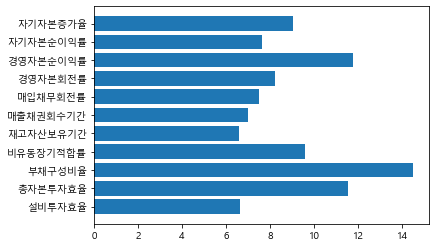

In [27]:
model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train)
plt.barh(X_train.columns, model.feature_importances_ )